In [3]:
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['axes.grid'] = True

np.set_printoptions(suppress=True, precision=5)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [7]:
import os
import shutil
from glob import glob
import random

data_dir = 'hand_digits'

if os.path.exists(data_dir):
    shutil.rmtree(data_dir)

shutil.unpack_archive('hand_digits.zip', './')

train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
os.makedirs(train_dir)
os.makedirs(test_dir)

for n in range(10):
    no_dir = os.path.join(train_dir, str(n))
    os.makedirs(no_dir)
    no_dir = os.path.join(test_dir, str(n))
    os.makedirs(no_dir)

files = glob(f'{data_dir}/*.png')
print(f'{len(files)=}')
random.seed(100)
random.shuffle(files)
train_size = int(len(files) * 6 / 7)

for file in files[:train_size]:
    no_dir = os.path.join(train_dir, os.path.basename(file)[0])
    shutil.move(file, no_dir)

for file in files[train_size:]:
    no_dir = os.path.join(test_dir, os.path.basename(file)[0])
    shutil.move(file, no_dir)


len(files)=998


In [9]:
from PIL import Image

files = glob(f'{data_dir}/**/*.png', recursive=True)

for file in files:
    for angle in range(-46, 47, 4):
        img = Image.open(file)
        img_r = img.rotate(angle, fillcolor=0xffffff)
        img.save(file.replace('.png', f'_A{angle}.png'))


files = glob(f'{data_dir}/**/*.png', recursive=True)
print(f'{len(files)=}')


len(files)=24950


In [10]:
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1)),
    transforms.Lambda(lambda x: -x)
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
batch_size = 100
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


100
100


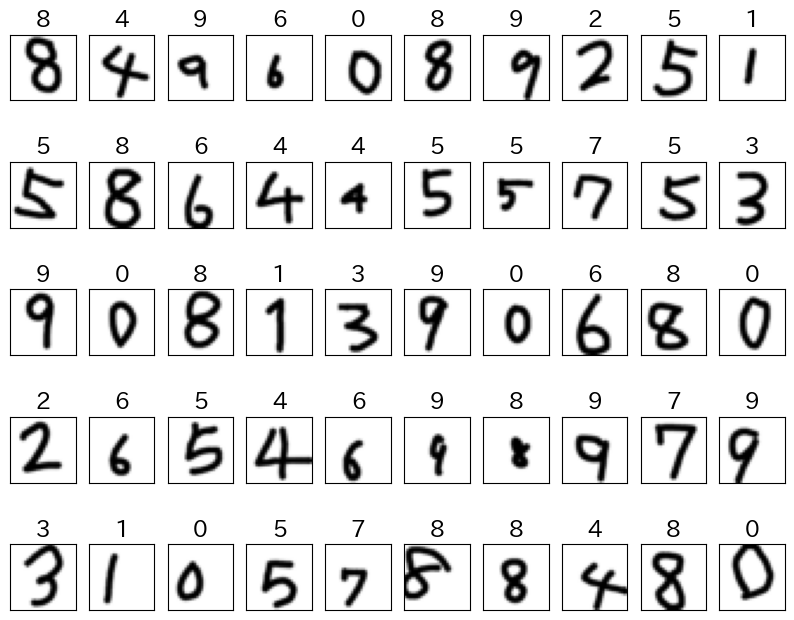

In [11]:
inputs, labels = next(iter(train_loader))
print(len(inputs))
print(len(labels))

plt.figure(figsize=(10,8))
for i in range(50):
    ax = plt.subplot(5, 10, i+1)
    image, label = inputs[i], labels[i]
    plt.imshow(image.reshape(28, 28), cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
inputs, labels = next(iter(train_loader))

n_input = inputs[0].shape[0]
n_output = 10

n_hidden = 128

print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

net = Net(n_input, n_output, n_hidden)
net = net.to(device)

lr = 0.01

optimizer = torch.optim.SGD(net.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()


n_input: 784  n_hidden: 128 n_output: 10


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [1/100], loss: 1.72054 acc: 0.54681 val_loss: 1.20663, val_acc: 0.74126


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.97510 acc: 0.74695 val_loss: 0.82703, val_acc: 0.79021


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.72666 acc: 0.80435 val_loss: 0.71622, val_acc: 0.78322


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.60346 acc: 0.83897 val_loss: 0.64668, val_acc: 0.81818


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.52013 acc: 0.85839 val_loss: 0.63785, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.45629 acc: 0.87602 val_loss: 0.62902, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.40570 acc: 0.89235 val_loss: 0.63348, val_acc: 0.81818


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.36260 acc: 0.90353 val_loss: 0.63511, val_acc: 0.79720


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.32514 acc: 0.91808 val_loss: 0.63251, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.29197 acc: 0.92767 val_loss: 0.63544, val_acc: 0.81818


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.26235 acc: 0.93843 val_loss: 0.64891, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.23621 acc: 0.94770 val_loss: 0.65684, val_acc: 0.78322


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.21354 acc: 0.95715 val_loss: 0.66065, val_acc: 0.79021


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.19218 acc: 0.96491 val_loss: 0.67358, val_acc: 0.78322


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.17337 acc: 0.97127 val_loss: 0.66106, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.15625 acc: 0.97796 val_loss: 0.66798, val_acc: 0.79720


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.14093 acc: 0.98049 val_loss: 0.69207, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.12671 acc: 0.98419 val_loss: 0.68708, val_acc: 0.79720


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.11463 acc: 0.98709 val_loss: 0.69219, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.10374 acc: 0.99046 val_loss: 0.69877, val_acc: 0.79021


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.09424 acc: 0.99317 val_loss: 0.71215, val_acc: 0.79720


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.08589 acc: 0.99602 val_loss: 0.71203, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.07859 acc: 0.99719 val_loss: 0.73298, val_acc: 0.79021


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.07161 acc: 0.99850 val_loss: 0.72439, val_acc: 0.79720


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.06596 acc: 0.99888 val_loss: 0.72825, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.06091 acc: 0.99949 val_loss: 0.73031, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.05624 acc: 0.99972 val_loss: 0.74913, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.05214 acc: 0.99995 val_loss: 0.74540, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.04845 acc: 1.00000 val_loss: 0.74912, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.04525 acc: 1.00000 val_loss: 0.75197, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.04230 acc: 1.00000 val_loss: 0.75443, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.03966 acc: 1.00000 val_loss: 0.76868, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.03724 acc: 1.00000 val_loss: 0.77119, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.03511 acc: 1.00000 val_loss: 0.77153, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.03314 acc: 1.00000 val_loss: 0.77426, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.03132 acc: 1.00000 val_loss: 0.78469, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.02966 acc: 1.00000 val_loss: 0.78995, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.02817 acc: 1.00000 val_loss: 0.78256, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.02681 acc: 1.00000 val_loss: 0.79220, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.02556 acc: 1.00000 val_loss: 0.79265, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.02435 acc: 1.00000 val_loss: 0.79703, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.02328 acc: 1.00000 val_loss: 0.80007, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.02228 acc: 1.00000 val_loss: 0.80332, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.02135 acc: 1.00000 val_loss: 0.80282, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.02048 acc: 1.00000 val_loss: 0.80205, val_acc: 0.80420


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.01969 acc: 1.00000 val_loss: 0.81189, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.01891 acc: 1.00000 val_loss: 0.81802, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.01821 acc: 1.00000 val_loss: 0.81845, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.01754 acc: 1.00000 val_loss: 0.81513, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.01691 acc: 1.00000 val_loss: 0.81509, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.01633 acc: 1.00000 val_loss: 0.82724, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.01579 acc: 1.00000 val_loss: 0.82655, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.01527 acc: 1.00000 val_loss: 0.82748, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.01476 acc: 1.00000 val_loss: 0.83068, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.01432 acc: 1.00000 val_loss: 0.83195, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.01387 acc: 1.00000 val_loss: 0.83242, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.01345 acc: 1.00000 val_loss: 0.83723, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.01306 acc: 1.00000 val_loss: 0.83960, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.01270 acc: 1.00000 val_loss: 0.84074, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.01233 acc: 1.00000 val_loss: 0.84425, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.01199 acc: 1.00000 val_loss: 0.84366, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.01167 acc: 1.00000 val_loss: 0.84798, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.01135 acc: 1.00000 val_loss: 0.84415, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.01106 acc: 1.00000 val_loss: 0.85235, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.01078 acc: 1.00000 val_loss: 0.85285, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.01051 acc: 1.00000 val_loss: 0.85404, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.01026 acc: 1.00000 val_loss: 0.85353, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.01001 acc: 1.00000 val_loss: 0.85861, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00977 acc: 1.00000 val_loss: 0.86263, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00954 acc: 1.00000 val_loss: 0.86081, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00933 acc: 1.00000 val_loss: 0.86370, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.00912 acc: 1.00000 val_loss: 0.86227, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00892 acc: 1.00000 val_loss: 0.86751, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00873 acc: 1.00000 val_loss: 0.86898, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.00854 acc: 1.00000 val_loss: 0.87257, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00836 acc: 1.00000 val_loss: 0.86996, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00820 acc: 1.00000 val_loss: 0.87235, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.00803 acc: 1.00000 val_loss: 0.87420, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.00787 acc: 1.00000 val_loss: 0.87174, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.00772 acc: 1.00000 val_loss: 0.87835, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00757 acc: 1.00000 val_loss: 0.87881, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00742 acc: 1.00000 val_loss: 0.88419, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00729 acc: 1.00000 val_loss: 0.88207, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.00715 acc: 1.00000 val_loss: 0.88045, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00702 acc: 1.00000 val_loss: 0.88087, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00689 acc: 1.00000 val_loss: 0.88254, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00677 acc: 1.00000 val_loss: 0.88689, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00666 acc: 1.00000 val_loss: 0.89042, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.00654 acc: 1.00000 val_loss: 0.89072, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00643 acc: 1.00000 val_loss: 0.88892, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00632 acc: 1.00000 val_loss: 0.89124, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.00621 acc: 1.00000 val_loss: 0.89072, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00611 acc: 1.00000 val_loss: 0.89295, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.00602 acc: 1.00000 val_loss: 0.89345, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00592 acc: 1.00000 val_loss: 0.89585, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00583 acc: 1.00000 val_loss: 0.89871, val_acc: 0.81119


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00574 acc: 1.00000 val_loss: 0.89737, val_acc: 0.81818


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.00565 acc: 1.00000 val_loss: 0.89872, val_acc: 0.81818


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00556 acc: 1.00000 val_loss: 0.90228, val_acc: 0.81818


  0%|          | 0/214 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.00548 acc: 1.00000 val_loss: 0.90195, val_acc: 0.81818
初期状態: 損失: 1.20663 精度: 0.74126
最終状態: 損失: 0.90195 精度: 0.81818


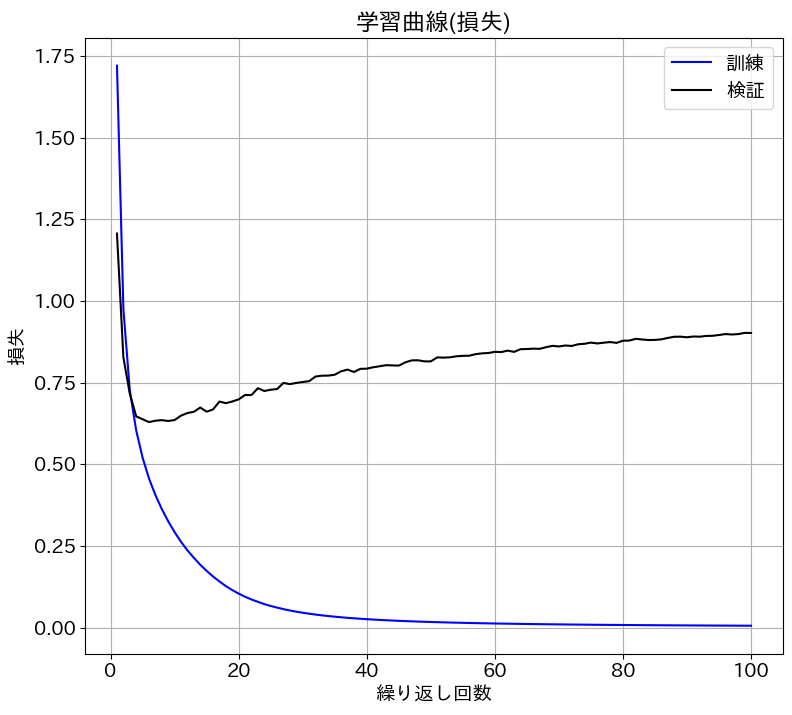

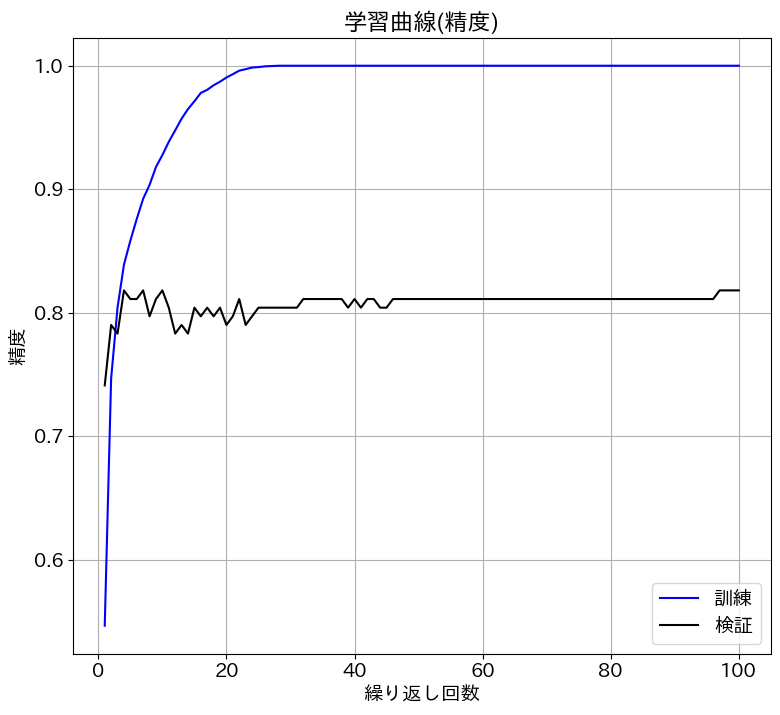

In [7]:

num_epochs = 100

history = np.zeros((0,5))

from tqdm.notebook import tqdm

for epoch in range(num_epochs):
    n_train_acc, n_val_acc = 0, 0
    train_loss, val_loss = 0, 0
    n_train, n_test = 0, 0

    for inputs, labels in tqdm(train_loader):
        train_batch_size = len(labels)
        n_train += train_batch_size

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        predicted = torch.max(outputs, 1)[1]

        train_loss += loss.item() * train_batch_size
        n_train_acc += (predicted == labels).sum().item()


    with torch.no_grad():
      for inputs_test, labels_test in test_loader:
          test_batch_size = len(labels_test)

          n_test += test_batch_size

          inputs_test = inputs_test.to(device)
          labels_test = labels_test.to(device)

          outputs_test = net(inputs_test)

          loss_test = criterion(outputs_test, labels_test)

          predicted_test = torch.max(outputs_test, 1)[1]

          val_loss +=  loss_test.item() * test_batch_size
          n_val_acc +=  (predicted_test == labels_test).sum().item()

    train_acc = n_train_acc / n_train
    val_acc = n_val_acc / n_test

    ave_train_loss = train_loss / n_train
    ave_val_loss = val_loss / n_test

    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {ave_train_loss:.5f} acc: {train_acc:.5f} val_loss: {ave_val_loss:.5f}, val_acc: {val_acc:.5f}')

    item = np.array([epoch+1 , ave_train_loss, train_acc, ave_val_loss, val_acc])
    history = np.vstack((history, item))

print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()


In [ ]:
torch.save(net.state_dict(), 'param_file_name_cuda0.pth')

net.load_state_dict(torch.load('param_file_name_cuda0.pth'))

net.load_state_dict(torch.load('param_file_name_cuda0.pth', map_location={'cuda:0': 'cpu'}))

torch.save(net.state_dict(), 'hand_digit_Net_cuda0.pth')

In [13]:
class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

net = Net(n_input, n_output, n_hidden).to(device)

net.load_state_dict(torch.load('hand_digit_Net_cuda0.pth'))


<All keys matched successfully>

100
100


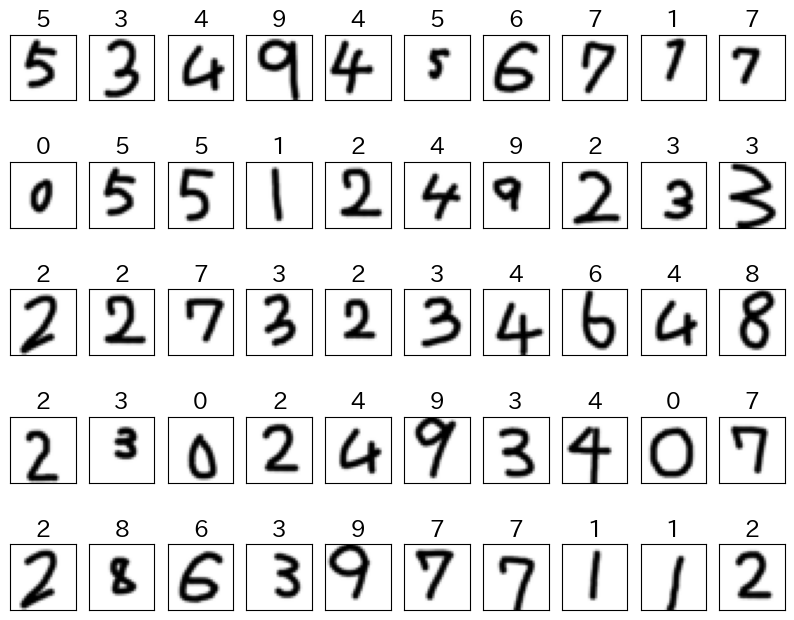

In [16]:
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True)

inputs, labels = next(iter(test_loader))
print(len(inputs))
print(len(labels))

plt.figure(figsize=(10,8))
for i in range(50):
    ax = plt.subplot(5, 10, i+1)
    image, label = inputs[i], labels[i]
    plt.imshow(image.reshape(28, 28), cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()